# Exercises

## Conceptual

**1 (a)**: Better | with the large sample size, a more flexible approach will fit the data closer than an inflexible approach would  
**1 (b)**: Worse | an overly flexible model would overfit the small number of observations  
**1 (c)**: Better | with more degrees of freedom, a flexible model would obtain a better fit  
**1 (d)**: Worse | a flexible model will fit to the noise in the error and increase variance more than an inflexible model would  

**2 (a)**: Regression | Inference | $n =$ 500 firms in the US | $p =$ profit, number of employees, industry  
**2 (b)**: Classification | Prediction | $n =$ 20 similar products | $p =$ price charged, marketing budget, competition price, ten other variables  
**2 (c)**: Regression | Prediction | $n =$ 52 (weekly data for 2012) | $p =$ % change in USD/Euro, % change in US market, % change in British market, % change in German market  

**3 (a)**:  
<img src='https://github.com/tsansom/islpy/blob/master/figures/Chapter2/exercise3a.jpg?raw=true' alt='Exercise 3(a)' style="width: 400px;"/>  
**3 (b)**:  
*Test error* is concave upward due to the bias-variance tradeoff. Increased flexibility decreases test error before the model begins to overfit.  
*Training error* decreases monotonically because increased flexibility yields a closer fit to training data  
*Variance* increases monotonically because increased flexibility will eventually yield overfitting  
*Bias* decreases nonotonically because incrased flexibility yields a closer fit  
*Bayes error* defines the lower limit of the test error. If the training error falls below the Bayes error, overfitting has occured  

**4 (a)**:  
* Classifying customer buying behavior 
 * inference
 * response: frugal, normal, wreckless 
 * predictors: income, spending  
* Predicting a stock's price direction
 * prediction
 * response: up, down
 * predictors: yesterday's price movement, yesterday's % change, two days prior price movement, two days prior % change
* Classification of illness
 * inference
 * response: ill, healthy
 * predictors: heart rate, breath rate, cholesterol, blood pressure  
 
**4 (b)**:
* Car part replacement
 * inference
 * response: good, replace
 * predictors: age of part, mileage, current diagnostics
* Expected salary
 * prediction
 * response: salary in dollars
 * predictors: age, years of experience, years of education
* Optimal advertising budget spending
 * inference
 * response: sales
 * predictors: tv budget, radio budget, newspaper budget  

**4 (c)**:
* Cancer type
* Movie recommendations
* Demographic segmentation  

**5**:
* Advantage:
 * More flexible models are better able to predict highly non-linear responses
* Disadvantage:
 * Requires a much greater amount of observations
 * Can easily overfit if model follows the noise to closely
* A more flexible model would be preferred when the prediction is more important than the interpretability of a model  

**6**:
A parametric model simplifies the estimation of $f$ because we only need to estimate $p + 1$ coefficients. A non-parametric model makes no assumptions on the functional form of $f$ at the cost of interpretability.
* Parametric
 * Advantage: simplified modeling of $f$ to a few parameters, not as many observations required
 * Disadvantage: potentially inaccurate estimates of $f$ if the model assumptions are incorrect
* Non-parametric
 * Advantage: can model more complicated responses
 * Disadvantage: easy to overfit, requires many more observations  
 
**7 (a)**:  

|Obs.|$X_1$|$X_2$|$X_3$|Dist.|$Y$|
|---|---|---|---|---|---|
|1|0|3|0|3|Red|
|2|2|0|0|2|Red|
|3|0|1|3|~3.2|Red|
|4|0|1|2|~2.2|Green|
|5|-1|0|1|~1.4|Green|
|6|1|1|1|~1.7|Red|  
**7 (b)**: Green - The closest observation is 5 (Green)  
**7 (c)**: Red - The 3 closest observations are 5 (Green), 6 (Red), 2 (Red)  
**7 (d)**: A small $K$ would be better for a nonlinear decision boundary because it offers more flexibility than a large $K$ which would approach linearity  

## Applied

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#This just turns off annoying pandas SettingWithCopyWarning warnings
pd.options.mode.chained_assignment = None

**8 (a)**:

In [2]:
college = pd.read_csv('../../data/College.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**8 (b)**:

In [3]:
college = pd.read_csv('../../data/College.csv', index_col=0)
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**8 (c) i**:

In [4]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


**8 (c) ii**:

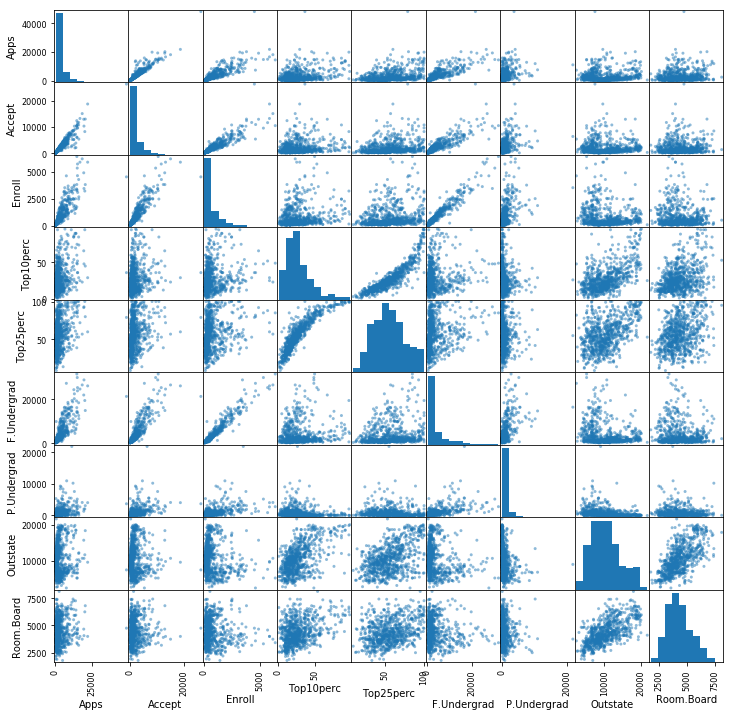

In [5]:
pd.plotting.scatter_matrix(college[college.columns[:10]], figsize=(12, 12));

**8 (c) iii**:

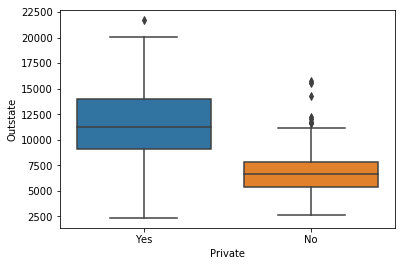

In [6]:
sns.boxplot(x=college['Private'], y=college['Outstate'])

**8 (c) iv**:

Elite: 78
NonElite: 699


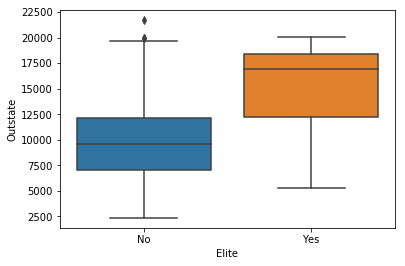

In [7]:
college['Elite'] = 'No'
college['Elite'][college['Top10perc'] > 50] = 'Yes'
#count the number of elite schools
Elite = college['Elite'][college['Elite'] == 'Yes'].count()
NonElite = len(college) - Elite
#alternative
#print(college['Elite'].describe())

print('Elite: {}\nNonElite: {}'.format(Elite, NonElite))
sns.boxplot(x=college['Elite'], y=college['Outstate']);

**8 (c) v**:

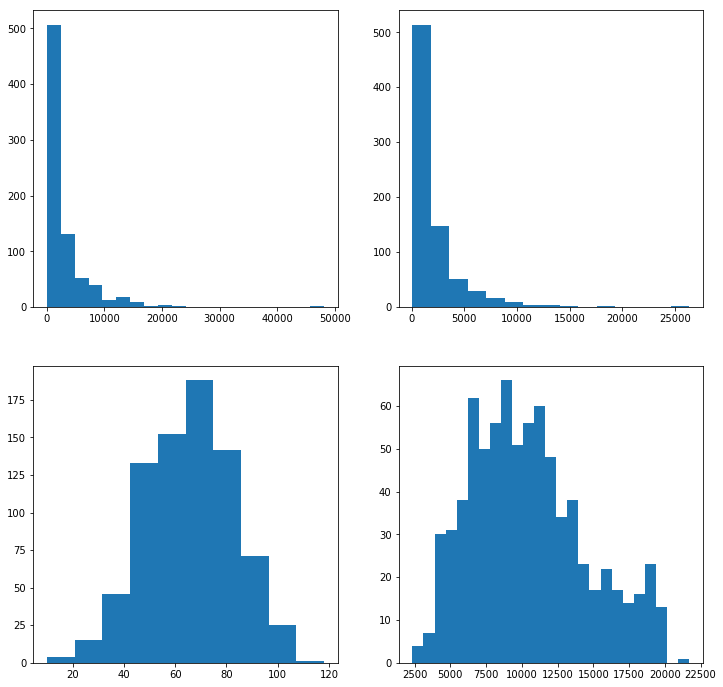

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12));
ax1.hist(college['Apps'], bins=20);
ax2.hist(college['Accept'], bins=15);
ax3.hist(college['Grad.Rate'], bins=10);
ax4.hist(college['Outstate'], bins=25);

**8 (c) vi**: I'll leave this one for you :)

**9 (a)**:

In [9]:
auto = pd.read_csv('../../data/Auto.csv', na_values='?')

quantitative = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
qualitative = ['origin', 'name']
print('Qualitative: {}'.format(quantitative))
print('Quantitative: {}'.format(qualitative))

Qualitative: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
Quantitative: ['origin', 'name']


**9 (b)**:

In [10]:
for c in quantitative:
    print('{:20} range = {} to {}'.format(c, auto[c].min(), auto[c].max()))

mpg                  range = 9.0 to 46.6
cylinders            range = 3 to 8
displacement         range = 68.0 to 455.0
horsepower           range = 46.0 to 230.0
weight               range = 1613 to 5140
acceleration         range = 8.0 to 24.8
year                 range = 70 to 82


**9 (c)**:

In [11]:
for c in quantitative:
    print('{:20} mean = {:8.2f}   std = {:.2f}'.format(c, auto[c].mean(), auto[c].std()))

mpg                  mean =    23.52   std = 7.83
cylinders            mean =     5.46   std = 1.70
displacement         mean =   193.53   std = 104.38
horsepower           mean =   104.47   std = 38.49
weight               mean =  2970.26   std = 847.90
acceleration         mean =    15.56   std = 2.75
year                 mean =    75.99   std = 3.69


**9 (d)**:

In [12]:
#python indexes from zero so need to subtract one
auto2 = auto.drop([9, 84])
for c in quantitative:
    print('{:20} range = {:4} to {:5}  mean={:8.2f}  std={:8.2f}'.format(c, auto2[c].min(), auto2[c].max(),
                                                                         auto2[c].mean(), auto2[c].std()))

mpg                  range =  9.0 to  46.6  mean=   23.53  std=    7.83
cylinders            range =    3 to     8  mean=    5.46  std=    1.70
displacement         range = 68.0 to 455.0  mean=  193.28  std=  104.06
horsepower           range = 46.0 to 230.0  mean=  104.29  std=   38.34
weight               range = 1613 to  5140  mean= 2970.24  std=  847.76
acceleration         range =  8.0 to  24.8  mean=   15.57  std=    2.73
year                 range =   70 to    82  mean=   76.02  std=    3.68


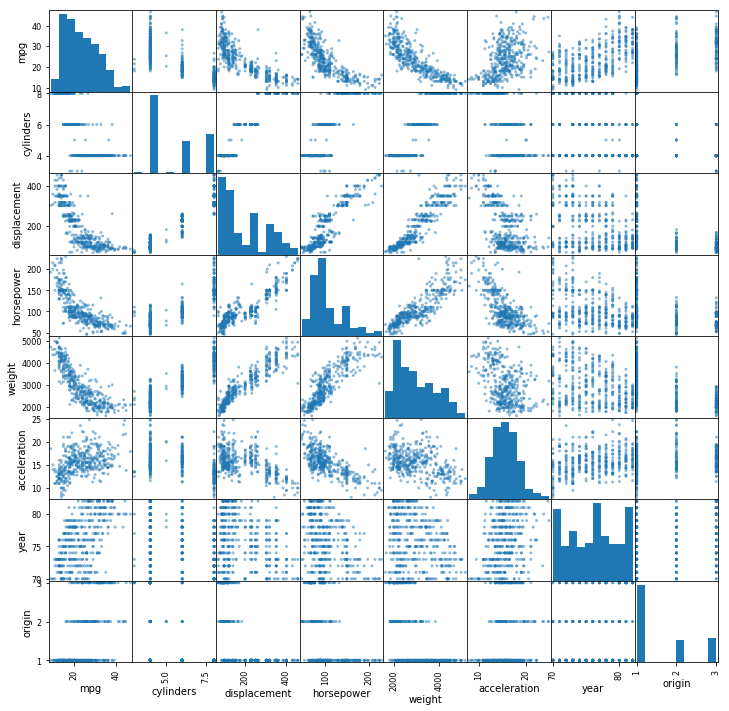

In [13]:
pd.plotting.scatter_matrix(auto, figsize=(12, 12));

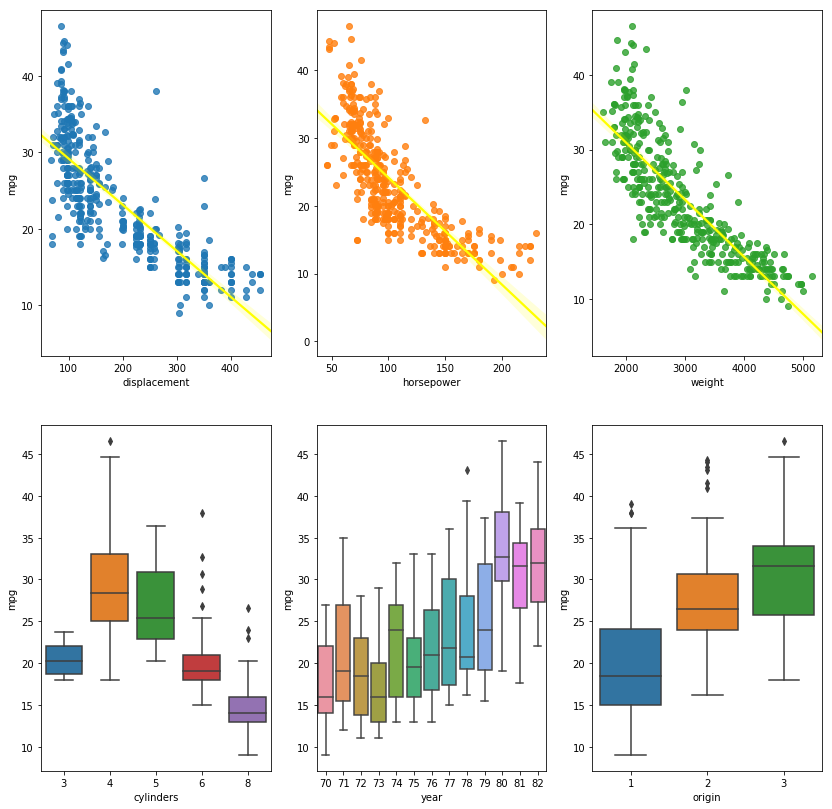

In [14]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(14, 14));
sns.regplot(x=auto['displacement'], y=auto['mpg'], line_kws={'color': 'yellow'}, ax=ax1);
sns.regplot(x=auto['horsepower'], y=auto['mpg'], line_kws={'color': 'yellow'}, ax=ax2);
sns.regplot(x=auto['weight'], y=auto['mpg'], line_kws={'color': 'yellow'}, ax=ax3);
sns.boxplot(x=auto['cylinders'], y=auto['mpg'], ax=ax4);
sns.boxplot(x=auto['year'], y=auto['mpg'], ax=ax5);
sns.boxplot(x=auto['origin'], y=auto['mpg'], ax=ax6);

**10 (a)**:

In [15]:
from sklearn.datasets import load_boston

boston_raw = load_boston()
boston = pd.DataFrame(data=boston_raw['data'], columns=boston_raw['feature_names'])
#boston['PRICE'] = boston_raw['target']
print(boston_raw['DESCR'])
print('Rows (observations): {}\nColumns (predictors): {}'.format(boston.shape[0], boston.shape[1]))

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

**10 (b)**:

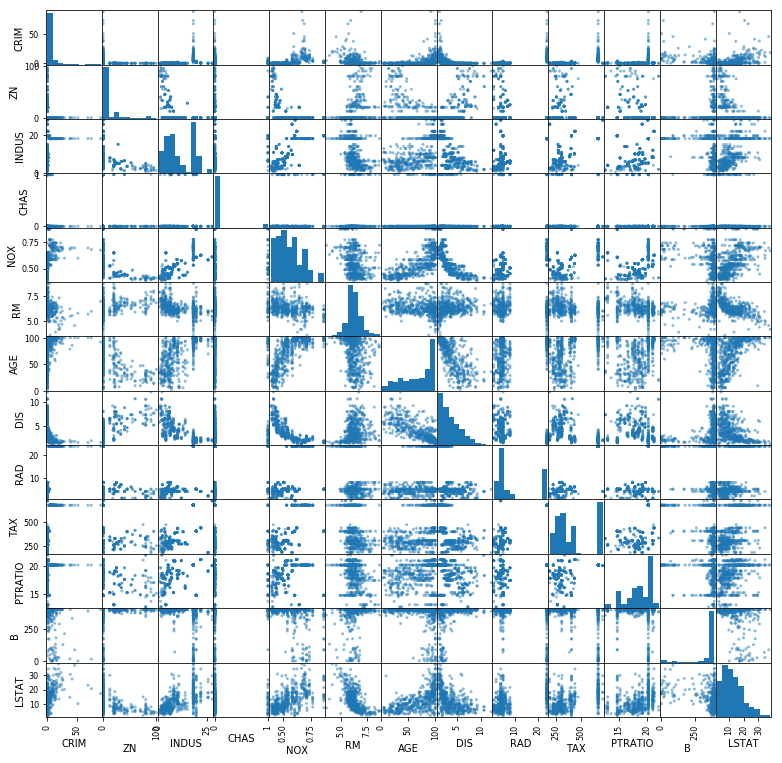

In [16]:
pd.plotting.scatter_matrix(boston, figsize=(13, 13));

**10 (c)**:

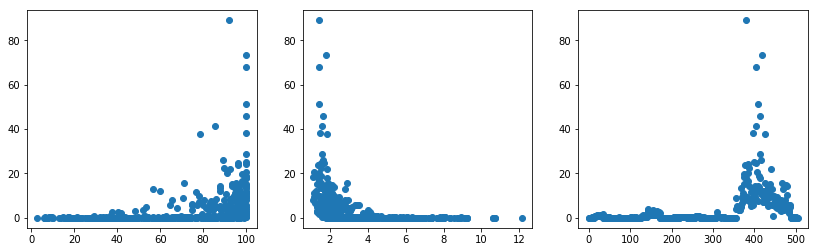

In [17]:
import seaborn as sns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
ax1.scatter(boston['AGE'], boston['CRIM'])
ax2.scatter(boston['DIS'], boston['CRIM'])
ax3.scatter(boston.index, boston['CRIM'])

** 10(d)**:

In [18]:
boston.sort_values(by='CRIM', ascending=False).head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98
404,41.5292,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59
427,37.6619,0.0,18.1,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52
413,28.6558,0.0,18.1,0.0,0.597,5.155,100.0,1.5894,24.0,666.0,20.2,210.97,20.08
417,25.9406,0.0,18.1,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64


In [19]:
boston.sort_values(by='TAX', ascending=False).head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06
405,67.92080,0.0,18.10,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
456,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24.0,666.0,20.2,10.48,19.01
455,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13
454,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24.0,666.0,20.2,6.68,18.71


In [20]:
boston.sort_values(by='PTRATIO', ascending=False).head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05
355,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
127,0.25915,0.0,21.89,0.0,0.624,5.693,96.0,1.7883,4.0,437.0,21.2,392.11,17.19
136,0.32264,0.0,21.89,0.0,0.624,5.942,93.5,1.9669,4.0,437.0,21.2,378.25,16.90
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
139,0.54452,0.0,21.89,0.0,0.624,6.151,97.9,1.6687,4.0,437.0,21.2,396.90,18.46
138,0.24980,0.0,21.89,0.0,0.624,5.857,98.2,1.6686,4.0,437.0,21.2,392.04,21.32
137,0.35233,0.0,21.89,0.0,0.624,6.454,98.4,1.8498,4.0,437.0,21.2,394.08,14.59
140,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16


**10 (e)**:

In [21]:
boston['CHAS'].sum()

35.0

**10 (f)**:

In [22]:
boston['MEDVAL'] = boston_raw['target']
boston.sort_values(by='MEDVAL').head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
398,38.35180,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
405,67.92080,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
400,25.04610,0.0,18.1,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
399,9.91655,0.0,18.1,0.0,0.693,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97,6.3
414,45.74610,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0


**10 (g)**:

In [23]:
print('More than 7 rooms: {}'.format(boston[boston['RM'] > 7].count()[0]))
print('More than 8 rooms: {}'.format(boston[boston['RM'] > 8].count()[0]))
boston[boston['RM'] > 8]

More than 7 rooms: 64
More than 8 rooms: 13


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVAL
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
224,0.31533,0.0,6.20,0.0,0.5040,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14,44.8
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
226,0.38214,0.0,6.20,0.0,0.5040,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6
232,0.57529,0.0,6.20,0.0,0.5070,8.337,73.3,3.8384,8.0,307.0,17.4,385.91,2.47,41.7
233,0.33147,0.0,6.20,0.0,0.5070,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95,48.3
253,0.36894,22.0,5.86,0.0,0.4310,8.259,8.4,8.9067,7.0,330.0,19.1,396.90,3.54,42.8
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
